<a href="https://colab.research.google.com/github/alicia-tsai/privacy-open-sourced-av-data/blob/main/Cloud_Vision_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloud Vision API for Lables, Landmark, Logos and Text Dectection.

To copy and run this notebook to your own Colab account, click **File** and **Save a copy in Drive**.

### Getting a Google API Credential.

First, visit [API console](http://console.cloud.google.com/apis), choose "Credentials" on the left-hand menu.  Choose "Create Credentials" and generate an API key for your application. You should probably restrict it by IP address to prevent abuse, but for now, just leave that field blank and delete the API key after trying out this demo.

Then, when you have your key, you will enter it in this first executable cell.

You can use the one that's already created but please limit your usage and restrict the API key access. The first 1000 units/month is free. For detailed pricing, please see [here](https://cloud.google.com/vision/pricing). I'll disable the API key if the request exceed the free limit.

In [ ]:
import getpass

APIKEY = getpass.getpass()

··········


### Authorize API requests

To get OAuth2 credentials for user authorization, go back to the [API manager](https://console.developers.google.com/apis).

1. Select the **Credentials** tab on the left panel. 

2. From the Credentials page, click on the **+ Create Credentials** button at the top, and choose **Service account**. 

3. Enter a **Service account name**. The form will create a valid account ID string similar to the name you chose. The **Service account description** field is optional.

4. Grant service account access. Click on the **Select a role** pulldown menu, then choose **Project → Viewer**. Then click **Continue**.

5. Make a private key for accessing the Vision API. Click the **+ Create Key** button and choose **JSON**. Save and rename the private key file to `GOOGLE_APPLICATION_CREDENTIALS.json`.

6. Upload the credientail key to colab by running the following cell.



In [ ]:
from google.colab import files
import os

credential_json = files.upload()
GOOGLE_APPLICATION_CREDENTIALS = os.path.join(os.getcwd(), "GOOGLE_APPLICATION_CREDENTIALS.json")

Saving GOOGLE_APPLICATION_CREDENTIALS.json to GOOGLE_APPLICATION_CREDENTIALS.json


## Invoke Vision API

From the same API console, choose "Dashboard" on the left-hand menu and **Enable API**.

Enable the [Googld Cloud Vision API](https://cloud.google.com/vision/docs/) for your project (search for them) if they are not already enabled. Follow this [tutorial](https://codelabs.developers.google.com/codelabs/cloud-vision-api-python/index.html?index=..%2F..index#3) if you are not sure how to do it.

The Vision API can work off an image in Cloud Storage or embedded directly into a POST message.

In [ ]:
!pip install -q google-cloud-vision
import io
from os import listdir
from os.path import isfile, join
#import base64
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.oauth2 import service_account
from google.cloud import vision

     |████████████████████████████████| 440kB 2.5MB/s 


## Upload Images

First upload an image or images to Colab by running the cell. You'll get prompted to upload a file. 

In [ ]:
for _ in range(6):
  image = files.upload()

Saving video-1.png to video-1.png


Saving video-2.png to video-2.png


Saving video-3.png to video-3.png


Saving video-4.png to video-4.png


Saving video-5.png to video-5.png


Saving video-6.png to video-6.png


To verify that the file upload was successful, run the following cell. You should also be able to see it in the left panel under **Files**.

In [ ]:
!ls

GOOGLE_APPLICATION_CREDENTIALS.json  video-1.png  video-3.png  video-5.png
sample_data			     video-2.png  video-4.png  video-6.png


In [ ]:
# change the file name to the image uploaded
# IMAGE1 = os.path.join(os.getcwd(),"93cab1f8-93cb30a0.jpg")
# IMAGE2 = os.path.join(os.getcwd(),"berkeley.png")
# IMAGE3 = os.path.join(os.getcwd(),"target.png")

IMAGES = [os.path.join(os.getcwd(), "video-{}.png".format(i)) for i in range(1, 7)]

## Create API Client and Perform Detection Request

In [ ]:
credentials = service_account.Credentials.from_service_account_file(GOOGLE_APPLICATION_CREDENTIALS)
client = vision.ImageAnnotatorClient(credentials=credentials)

### [Label Detection](https://cloud.google.com/vision/docs/labels)

Detect and extract information about entities in an image, across a broad group of categories.

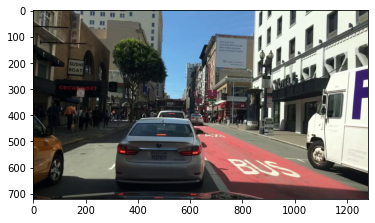

In [ ]:
plt.imshow(mpimg.imread(IMAGE1));

In [ ]:
with io.open(IMAGE1, 'rb') as image_file:
  content = image_file.read()

image = vision.types.Image(content=content)

response = client.label_detection(image=image)
labels = response.label_annotations

In [ ]:
for label in labels:
    print("{}: {:.2f}".format(label.description, label.score))

Lane: 0.97
Vehicle: 0.96
Mode of transport: 0.95
Car: 0.94
Transport: 0.92
Road: 0.89
Street: 0.88
Mid-size car: 0.87
Traffic: 0.85
Snapshot: 0.82


### [Landmark Detection](https://cloud.google.com/vision/docs/detecting-landmarks)

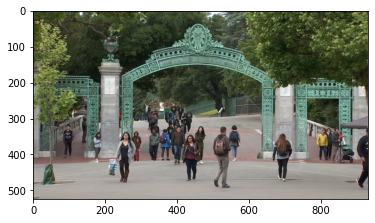

In [ ]:
plt.imshow(mpimg.imread(IMAGE2));

In [ ]:
with io.open(IMAGE2, 'rb') as image_file:
  content = image_file.read()

image = vision.types.Image(content=content)

response = client.landmark_detection(image=image)
landmarks = response.landmark_annotations

In [ ]:
for landmark in landmarks:
    print(landmark.description)
    for location in landmark.locations:
        lat_lng = location.lat_lng
        print('\tLatitude {}'.format(lat_lng.latitude))
        print('\tLongitude {}'.format(lat_lng.longitude))
        print()

Sather Gate
	Latitude 37.870252099999995
	Longitude -122.25948349999999

Sather Gate
	Latitude 37.870157
	Longitude -122.259486



In [ ]:
for IMAGE in IMAGES:
  print(IMAGE)
  with io.open(IMAGE, 'rb') as image_file:
      content = image_file.read()

  image = vision.types.Image(content=content)

  response = client.landmark_detection(image=image)
  landmarks = response.landmark_annotations

  if not landmarks:
    print("no landmark")

  for landmark in landmarks:
      print(landmark.description)
      for location in landmark.locations:
          lat_lng = location.lat_lng
          print('\tLatitude {}'.format(lat_lng.latitude))
          print('\tLongitude {}'.format(lat_lng.longitude))
          print()

/content/video-1.png
no landmark
/content/video-2.png
no landmark
/content/video-3.png
no landmark
/content/video-4.png
no landmark
/content/video-5.png
no landmark
/content/video-6.png
no landmark


### [Logos Detection](https://cloud.google.com/vision/docs/detecting-logos)

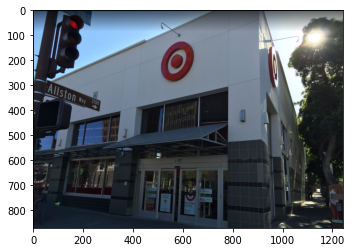

In [ ]:
plt.imshow(mpimg.imread(IMAGE3));

In [ ]:
with io.open(IMAGE3, 'rb') as image_file:
  content = image_file.read()

image = vision.types.Image(content=content)

response = client.logo_detection(image=image)
logos = response.logo_annotations

In [ ]:
for logo in logos:
    print(logo.description)

Target Corporation


In [ ]:
for IMAGE in IMAGES:
  print(IMAGE)
  with io.open(IMAGE, 'rb') as image_file:
      content = image_file.read()

  image = vision.types.Image(content=content)

  response = client.logo_detection(image=image)
  logos = response.logo_annotations

  if not logos:
    print("no logos")

  for logo in logos:
    print(logo.description)

/content/video-1.png
Roto-Rooter
/content/video-2.png
Grupo Modelo
/content/video-3.png
no logos
/content/video-4.png
no logos
/content/video-5.png
no logos
/content/video-6.png
no logos


### Text Dectection

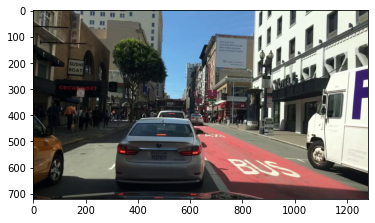

In [ ]:
plt.imshow(mpimg.imread(IMAGE1));

In [ ]:
with io.open(IMAGE1, 'rb') as image_file:
  content = image_file.read()

image = vision.types.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations

In [ ]:
for text in texts:
    print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))


"UNION SOUARE TL
Now ypes viral
then oanbes to san
Net men one
goes to she lureh party
O Gon ut
SUSHI
BOAT
CUCHLAOAT
BUS
7RIP829
"
bounds: (111,90),(1031,90),(1031,638),(111,638)

"UNION"
bounds: (702,90),(760,94),(759,104),(701,100)

"SOUARE"
bounds: (763,95),(817,98),(816,109),(762,106)

"TL"
bounds: (826,99),(838,100),(837,111),(825,110)

"Now"
bounds: (714,117),(730,118),(729,124),(714,123)

"ypes"
bounds: (733,120),(750,121),(750,126),(733,125)

"viral"
bounds: (753,117),(767,118),(766,128),(752,127)

"then"
bounds: (710,125),(729,126),(728,135),(709,134)

"oanbes"
bounds: (731,126),(768,129),(767,139),(730,136)

"to"
bounds: (772,129),(783,130),(782,140),(771,139)

"san"
bounds: (785,130),(799,131),(798,141),(784,140)

"Net"
bounds: (713,138),(729,139),(728,147),(712,146)

"men"
bounds: (733,141),(756,143),(755,148),(733,146)

"one"
bounds: (776,141),(793,143),(792,152),(775,151)

"goes"
bounds: (712,150),(730,151),(730,158),(712,157)

"to"
bounds: (733,151),(740,151),(740,156),

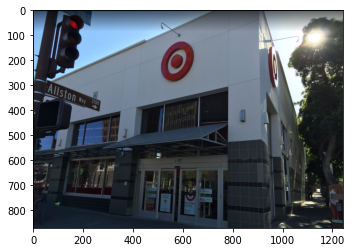

In [ ]:
plt.imshow(mpimg.imread(IMAGE3));

In [ ]:
with io.open(IMAGE3, 'rb') as image_file:
  content = image_file.read()

image = vision.types.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations

In [ ]:
for text in texts:
    print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))


"Allston Way
2100
2187
re Hiring
"
bounds: (47,292),(646,292),(646,777),(47,777)

"Allston"
bounds: (60,292),(182,335),(169,371),(47,329)

"Way"
bounds: (185,336),(223,349),(210,386),(172,373)

"2100"
bounds: (239,353),(271,363),(265,382),(233,372)

"2187"
bounds: (566,594),(595,593),(596,608),(567,609)

"re"
bounds: (620,767),(627,768),(626,775),(619,774)

"Hiring"
bounds: (629,767),(646,769),(645,777),(628,775)


In [ ]:
for IMAGE in IMAGES:
  print(IMAGE)
  with io.open(IMAGE, 'rb') as image_file:
      content = image_file.read()

  image = vision.types.Image(content=content)

  response = client.text_detection(image=image)
  texts = response.text_annotations

  if not texts:
    print("no texts")

  for text in texts:
    print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

/content/video-1.png

"RIGHT LANE
BUS
LANE
ENDS
N Needlepoint N
TAN FRANCISCO DELUE
HOP OFF
HOP ON
IONG TOURS
ASI
Thpar
TON&MUR HY
260
wwwwe
ELANTRA
5HYUNDAI
AUG Oforn
6YVL897
0eSAN FRANCISCO
ON
"
bounds: (525,5),(1387,5),(1387,874),(525,874)

"RIGHT"
bounds: (1297,33),(1325,32),(1325,41),(1297,42)

"LANE"
bounds: (1332,32),(1359,31),(1359,40),(1332,41)

"BUS"
bounds: (1310,55),(1346,56),(1346,73),(1310,72)

"LANE"
bounds: (1305,81),(1350,80),(1350,96),(1305,97)

"ENDS"
bounds: (1305,105),(1350,104),(1350,120),(1305,121)

"N"
bounds: (1088,113),(1102,113),(1102,136),(1088,136)

"Needlepoint"
bounds: (1112,112),(1206,111),(1206,135),(1112,136)

"N"
bounds: (1240,110),(1250,110),(1250,133),(1240,133)

"TAN"
bounds: (760,202),(778,196),(784,213),(766,219)

"FRANCISCO"
bounds: (785,194),(834,188),(836,206),(787,212)

"DELUE"
bounds: (842,188),(867,189),(867,207),(842,206)

"HOP"
bounds: (852,224),(880,222),(881,235),(853,238)

"OFF"
bounds: (886,220),(915,217),(917,236),(888,239)

"HOP"
bo